# **WeatherPy**
----

# Observation 1: Scatter Plot of Latitude & Temperature 
The scatter plot of latitude and temperature shows an inverted-U relationship. That is, as the latitudes increase from negative values to zero, tempeartures increase and then as the latitudes increase from zero to positive values, tempearture decrease. In other words, temperatures tend to be the highest in cities near the equator. As cities move away from the equator towards the southern and northern hemispheres, their temperatures drop. 

# Observation 2: Linear Regression of Latitude vs Temperature 
The linear regression for the northern hemisphere depicts a strong “negative” relationship (high R-square) between latitude and temperature. This finding implies that as cities move away from the equator to the northern hemisphere (latitude increases from zero to positive), their temperature decrease.   

The linear regression for the southern hemisphere depicts a strong “positive” relationship (high R-square) between latitude and temperature. This finding implies that as cities move away from the equator to the southern hemisphere (latitude decreases from zero to negative), their temperature decrease. In summary, the two linear regressions of latitude versus temperature support the findings of the scatter plot with more clarity.

# Observation 3: Humidity, Cloudiness, & Wind Speed
The analyses of city humidity, cloudiness, and wind speed suggest that their intensity do not vary by the city latitude. The scatter plots do not show any clear pattern. Similarly, the respective regressions of humidity, cloudiness, and wind speed do not indicate strong relationship with city latitude (low R-squares). That is, the information about whether a city is located near equator or away from equator, does not provide clear insight on the possibility of humidity, cloudiness, or wind speed.     

In [1]:
# Dependencies
%load_ext lab_black
import requests
import json
import pandas as pd
import numpy as np
from config import api_key
from citipy import citipy
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.linear_model import LinearRegression

## Generate Cities List

In [2]:
cities = []

# Creating a set of random lat and lng combinations
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lng = zip(lats, lngs)

# Finding nearest city for each lat-lng combination
for value in lat_lng:
    city = citipy.nearest_city(value[0], value[1]).city_name

    # If the city is unique, then adding it to the cities list
    if city not in cities:
        cities.append(city)

# Calculating total city count
total_cities = len(cities)
total_cities

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Creating empty lists for data needed for analyses
city_id = []
city_name_list = []
country_list = []
date_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
lat_list = []
lng_list = []

# Starting numbers for record and set
record = 0
set = 1

# Text to inform the for loop has started
print("-----------------------------")
print("Beginning Data Retrieval")
print("-----------------------------")

# Basic url information
url = "http://api.openweathermap.org/data/2.5/weather?"

# For loop to populate empty lists. Added exception on API requests.
for city in cities:
    response = requests.get(
        url, params={"appid": api_key, "units": "imperial", "q": city}
    ).json()

    if record < 50:
        record += 1

    else:
        set += 1
        record = 1

    try:
        ID = response["id"]
        city_id.append(response["id"])
        city_name_list.append(response["name"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        max_temp_list.append(response["main"]["temp_max"])
        humidity_list.append(response["main"]["humidity"])
        cloudiness_list.append(response["clouds"]["all"])
        wind_speed_list.append(response["wind"]["speed"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])

        print(f"Processing Record {record} of Set {set} | {city} with City ID:{ID}")

    except (KeyError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Ending Data Retrieval")
print("-----------------------------")

-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | albany with City ID:5106841
Processing Record 2 of Set 1 | ribeira grande with City ID:3372707
Processing Record 3 of Set 1 | port elizabeth with City ID:964420
Processing Record 4 of Set 1 | krasnokamensk with City ID:2021618
Processing Record 5 of Set 1 | nizwa with City ID:286987
City not found. Skipping...
Processing Record 7 of Set 1 | busselton with City ID:2075265
Processing Record 8 of Set 1 | port alfred with City ID:964432
Processing Record 9 of Set 1 | airai with City ID:1651810
Processing Record 10 of Set 1 | oneonta with City ID:5129852
City not found. Skipping...
Processing Record 12 of Set 1 | bonavista with City ID:5905393
Processing Record 13 of Set 1 | grand gaube with City ID:934479
Processing Record 14 of Set 1 | hilo with City ID:5855927
Processing Record 15 of Set 1 | chokurdakh with City ID:2126123
Processing Record 16 of Set 1 | olga with City ID:2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Converting raw data to a data frame: weather_df
weather_df = pd.DataFrame(
    {
        "City": city_name_list,
        "Country": country_list,
        "Date": date_list,
        "Max Temp (F)": max_temp_list,
        "Humidity (%)": humidity_list,
        "Cloudiness (%)": cloudiness_list,
        "Wind Speed (mph)": wind_speed_list,
        "Lat": lat_list,
        "Lng": lng_list,
    }
)

# Exporting city data into a csv file
weather_df.to_csv("../Output_Data/cities.csv", index=False)

# Displaying the data frame: weather_df
weather_df

,City,Country,Date,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Lat,Lng
0,Albany,US,1601180147,69.01,98,2,1.99,42.60,-73.97
1,Ribeira Grande,PT,1601180375,70.43,88,56,14.29,38.52,-28.70
2,Port Elizabeth,ZA,1601180220,50.00,76,2,13.87,-33.92,25.57
3,Krasnokamensk,RU,1601180375,53.55,44,0,19.24,50.10,118.04
4,Nizwá,OM,1601180376,86.70,25,0,1.41,22.93,57.53
...,...,...,...,...,...,...,...,...,...
551,Mabaruma,GY,1601180506,74.52,92,60,1.01,8.20,-59.78
552,Gwanda,ZW,1601180506,58.12,94,1,8.57,-20.93,29.00
553,Ranong,TH,1601180506,78.80,94,75,10.29,9.97,98.63
554,Kyabé,TD,1601180234,71.60,88,100,3.13,9.45,18.94


In [5]:
# Checking summary statistics. There are no cities that have humidity > 100%.
weather_df.describe()

,Date,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Lat,Lng
count,5.560000e+02,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000
mean,1.601180e+09,64.342590,72.131295,43.239209,7.759874,19.306853,14.611655
std,7.910018e+01,15.348732,19.499938,38.655214,4.968608,33.277756,90.505137
min,1.601180e+09,11.880000,11.000000,0.000000,0.220000,-54.800000,-175.200000
25%,1.601180e+09,51.995000,61.000000,1.000000,3.615000,-7.605000,-68.120000
50%,1.601180e+09,66.175000,76.000000,40.000000,6.930000,23.005000,20.025000
75%,1.601180e+09,76.080000,87.000000,80.250000,11.067500,45.350000,92.822500
max,1.601181e+09,96.800000,100.000000,100.000000,26.400000,78.220000,179.320000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

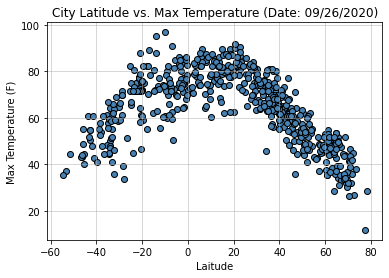

In [6]:
# Creating a scatter plot for Latitude vs. Temperature
plt.title("City Latitude vs. Max Temperature (Date: 09/26/2020)")
plt.scatter(
    weather_df["Lat"],
    weather_df["Max Temp (F)"],
    facecolor="steelblue",
    edgecolor="black",
)
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle="-", linewidth=1, alpha=0.5)
plt.savefig("../Images/City Latitude vs Max Temperature.png")
plt.show()

Highest temperature is found at 0 latitude and as the latidude increases or decreases, temperature drops.

## Latitude vs. Humidity Plot

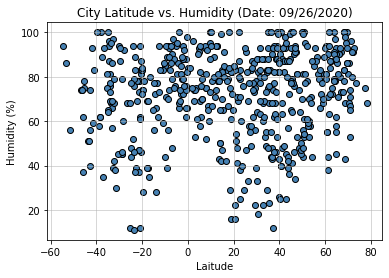

In [7]:
# Creating a scatter plot for Latitude vs. Humidity
plt.title("City Latitude vs. Humidity (Date: 09/26/2020)")
plt.scatter(
    weather_df["Lat"],
    weather_df["Humidity (%)"],
    facecolor="steelblue",
    edgecolor="black",
)
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle="-", linewidth=1, alpha=0.5)
plt.savefig("../Images/City Latitude vs Humidity.png")
plt.show()

Humidity tends to be high and less variant near the equator. However, the scatter plot does not indicate a clear relationship between city latitude and humidity. 

## Latitude vs. Cloudiness Plot

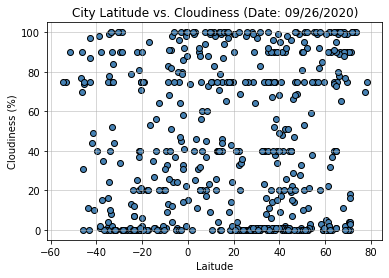

In [8]:
# Creating a scatter plot for Latitude vs. Cloudiness
plt.title("City Latitude vs. Cloudiness (Date: 09/26/2020)")
plt.scatter(
    weather_df["Lat"],
    weather_df["Cloudiness (%)"],
    facecolor="steelblue",
    edgecolor="black",
)
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle="-", linewidth=1, alpha=0.5)
plt.savefig("../Images/City Latitude vs Cloudiness.png")
plt.show()

The scatter plot does not indicate a clear relationship between city latitude and cloudiness.

## Latitude vs. Wind Speed Plot

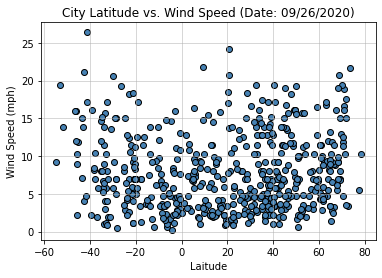

In [9]:
# Creating a scatter plot for Latitude vs. Wind Speed
plt.title("City Latitude vs. Wind Speed (Date: 09/26/2020)")
plt.scatter(
    weather_df["Lat"],
    weather_df["Wind Speed (mph)"],
    facecolor="steelblue",
    edgecolor="black",
)
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle="-", linewidth=1, alpha=0.5)
plt.savefig("../Images/City Latitude vs Wind Speed.png")
plt.show()

The scatter plot does not indicate a clear relationship between city latitude and wind speed.

## Linear Regression

In [10]:
# Creating data frames for Northern Hemisphere and Southern Hemisphere
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

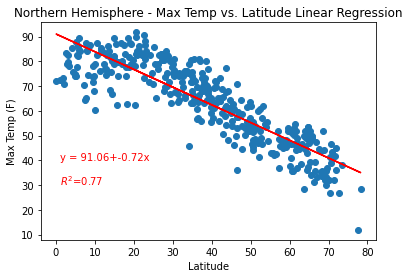

In [11]:
# Calculating the linear regression model for Northern Hemisphere - Max Temp vs. Latitude
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Max Temp (F)"]

X = [[e] for e in x_axis]
y = y_axis
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
intercept = model.intercept_
slope = model.coef_[0]
r_squared = model.score(X, y)

formula = f"y = {round(intercept,2)}+{round(slope, 2)}x"
r_squared_string = f"$R^{2}$={round(r_squared, 2)}"

# Generating the plot for linear regression
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.scatter(x_axis, y_axis)
plt.plot(X, predictions, color="red")
plt.text(1, 40, formula, color="red")
plt.text(1, 30, r_squared_string, color="red")
plt.savefig(
    "../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png"
)
plt.show()

There is a strong negative relationship between max temperature and latitude for the northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

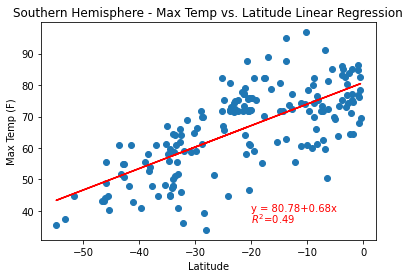

In [12]:
# Calculating the linear regression model for Southern Hemisphere - Max Temp vs. Latitude
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Max Temp (F)"]

X = [[e] for e in x_axis]
y = y_axis
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
intercept = model.intercept_
slope = model.coef_[0]
r_squared = model.score(X, y)

formula = f"y = {round(intercept,2)}+{round(slope, 2)}x"
r_squared_string = f"$R^{2}$={round(r_squared, 2)}"

# Generating the plot for linear regression
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.scatter(x_axis, y_axis)
plt.plot(X, predictions, color="red")
plt.text(-20, 40, formula, color="red")
plt.text(-20, 36, r_squared_string, color="red")
plt.savefig(
    "../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png"
)
plt.show()

There is a strong positive relationship between max temperature and latitude for the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

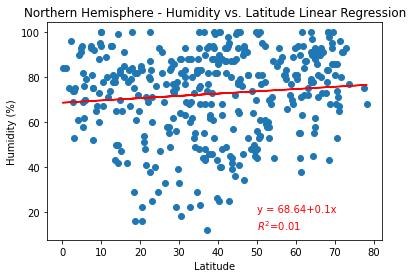

In [13]:
# Calculating the linear regression model for Northern Hemisphere - Humidity vs. Latitude
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Humidity (%)"]

X = [[e] for e in x_axis]
y = y_axis
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
intercept = model.intercept_
slope = model.coef_[0]
r_squared = model.score(X, y)

formula = f"y = {round(intercept,2)}+{round(slope, 2)}x"
r_squared_string = f"$R^{2}$={round(r_squared, 2)}"

# Generating the plot for linear regression
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(x_axis, y_axis)
plt.plot(X, predictions, color="red")
plt.text(50, 20, formula, color="red")
plt.text(50, 12, r_squared_string, color="red")
plt.savefig(
    "../Images/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png"
)
plt.show()

There is no significant relationship between humidity and latitude for the northern hemisphere. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

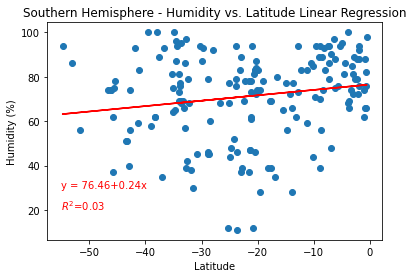

In [14]:
# Calculating the linear regression model for Southern Hemisphere - Humidity vs. Latitude
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Humidity (%)"]

X = [[e] for e in x_axis]
y = y_axis
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
intercept = model.intercept_
slope = model.coef_[0]
r_squared = model.score(X, y)

formula = f"y = {round(intercept,2)}+{round(slope, 2)}x"
r_squared_string = f"$R^{2}$={round(r_squared, 2)}"

# Generating the plot for linear regression
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(x_axis, y_axis)
plt.plot(X, predictions, color="red")
plt.text(-55, 30, formula, color="red")
plt.text(-55, 20, r_squared_string, color="red")
plt.savefig(
    "../Images/Southern Hemisphere - Humidity vs. Latitude Linear Regression.png"
)
plt.show()

There is no significant relationship between humidity and latitude for the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

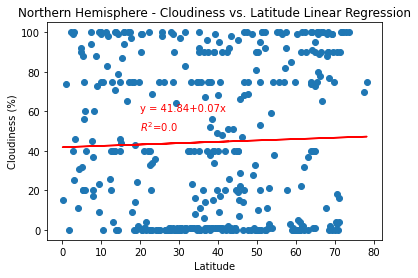

In [19]:
# Calculating the linear regression model for Northern Hemisphere - Cloudiness vs. Latitude
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Cloudiness (%)"]

X = [[e] for e in x_axis]
y = y_axis
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
intercept = model.intercept_
slope = model.coef_[0]
r_squared = model.score(X, y)

formula = f"y = {round(intercept,2)}+{round(slope, 2)}x"
r_squared_string = f"$R^{2}$={round(r_squared, 2)}"

# Generating the plot for linear regression
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(x_axis, y_axis)
plt.plot(X, predictions, color="red")
plt.text(20, 60, formula, color="red")
plt.text(20, 50, r_squared_string, color="red")
plt.savefig(
    "../Images/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png"
)
plt.show()

There is no significant relationship between cloudiness and latitude for the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

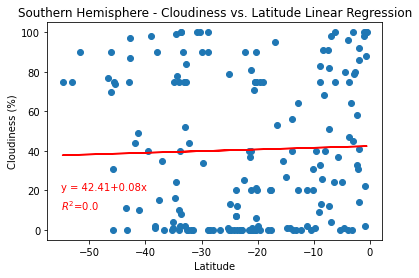

In [16]:
# Calculating the linear regression model for Southern Hemisphere - Cloudiness vs. Latitude
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Cloudiness (%)"]

X = [[e] for e in x_axis]
y = y_axis
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
intercept = model.intercept_
slope = model.coef_[0]
r_squared = model.score(X, y)

formula = f"y = {round(intercept,2)}+{round(slope, 2)}x"
r_squared_string = f"$R^{2}$={round(r_squared, 2)}"

# Generating the plot for linear regression
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(x_axis, y_axis)
plt.plot(X, predictions, color="red")
plt.text(-55, 20, formula, color="red")
plt.text(-55, 10, r_squared_string, color="red")
plt.savefig(
    "../Images/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png"
)
plt.show()

There is no significant relationship between cloudiness and latitude for the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

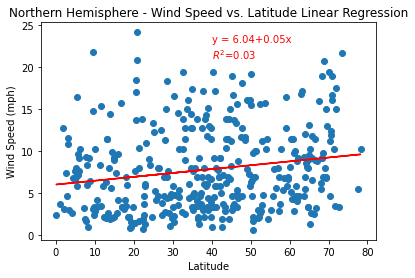

In [23]:
# Calculating the linear regression model for Northern Hemisphere - Wind Speed vs. Latitude
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Wind Speed (mph)"]

X = [[e] for e in x_axis]
y = y_axis
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
intercept = model.intercept_
slope = model.coef_[0]
r_squared = model.score(X, y)

formula = f"y = {round(intercept,2)}+{round(slope, 2)}x"
r_squared_string = f"$R^{2}$={round(r_squared, 2)}"

# Generating the plot for linear regression
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(x_axis, y_axis)
plt.plot(X, predictions, color="red")
plt.text(40, 23, formula, color="red")
plt.text(40, 21, r_squared_string, color="red")
plt.savefig(
    "../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png"
)
plt.show()

There is no significant relationship between wind speed and latitude for the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

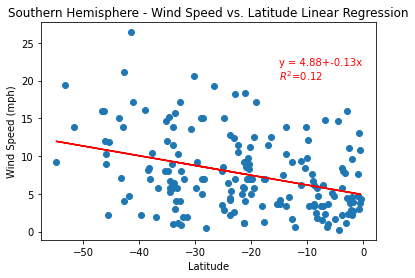

In [18]:
# Calculating the linear regression model for Southern Hemisphere - Wind Speed vs. Latitude
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Wind Speed (mph)"]

X = [[e] for e in x_axis]
y = y_axis
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
intercept = model.intercept_
slope = model.coef_[0]
r_squared = model.score(X, y)

formula = f"y = {round(intercept,2)}+{round(slope, 2)}x"
r_squared_string = f"$R^{2}$={round(r_squared, 2)}"

# Generating the plot for linear regression
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(x_axis, y_axis)
plt.plot(X, predictions, color="red")
plt.text(-15, 22, formula, color="red")
plt.text(-15, 20, r_squared_string, color="red")
plt.savefig(
    "../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png"
)
plt.show()

The regression model shows a negative relationship between wind speed and latitude for the southern hemisphere. However, the R-square value is not high enough to indicate a strong relationship.